##  Semantic Similarities by analysing the derived embeddings with PCA

In [529]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.patheffects as PathEffects
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px


df_embeddings = pd.read_csv("/Users/fabianmahner/dlss-project24/output/embeddings/embeddings_CBOW_total_posts.csv")


In [530]:
df_embeddings = df_embeddings.iloc[:,1:]

In [531]:
df_embeddings

,word,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,city,3.187496e-02,-1.255769e-01,-1.252872e-01,-7.430278e-02,-6.662598e-02,-1.061271e-01,8.790804e-02,-3.463078e-02,-1.090932e-01,...,8.918405e-02,-2.928032e-03,2.923920e-02,1.201511e-01,-4.159504e-03,-1.187051e-01,-8.843514e-02,1.570602e-02,-5.467511e-02,-9.079038e-02
1,without,6.184779e-02,-1.043726e-01,-8.448507e-02,2.080021e-01,-8.813742e-02,3.024186e-02,4.034633e-02,-8.739900e-02,4.342840e-02,...,-9.296446e-02,1.871214e-02,9.012337e-02,1.016743e-01,1.136650e-02,-9.624563e-02,5.905829e-02,5.760413e-02,9.226614e-02,-1.767980e-01
2,water,-5.455660e-02,-1.529249e-01,-1.626026e-01,-5.569708e-02,1.254430e-01,4.621255e-02,1.263181e-01,-1.231628e-01,-6.419506e-02,...,2.227263e-01,-7.700393e-02,-8.255928e-02,1.432757e-01,-3.375542e-02,-1.573365e-01,-1.036720e-01,1.159502e-01,-6.682982e-02,-1.246089e-01
3,be,1.396619e+00,-1.412009e+00,-1.445828e+00,-1.298377e-01,7.235935e-02,1.158835e-01,-7.927992e-02,1.433256e-01,4.399346e-02,...,1.399278e-01,-1.651254e-01,-1.674009e+00,1.453903e+00,1.091762e+00,-1.450030e+00,-1.242432e-01,9.707630e-01,-5.642841e-02,1.538694e-01
4,our,-6.786830e-02,-5.629227e-01,-5.894241e-01,1.014113e-01,-1.364908e-02,-3.954599e-01,-5.190908e-02,-4.611208e-03,-6.772427e-01,...,2.062865e-01,-7.302897e-02,5.780031e-02,5.850066e-01,2.507563e-01,-5.819518e-01,9.253128e-02,1.647053e-01,-5.934814e-02,-2.588651e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,colab,1.104704e-24,1.522647e-04,2.045534e-05,-8.925561e-03,-4.053197e-03,1.232454e-02,1.251300e-02,1.647083e-02,-4.748537e-03,...,-4.788051e-03,1.097929e-07,-4.185686e-03,-4.315797e-05,1.036578e-02,-7.689097e-05,4.621899e-04,3.194762e-03,2.176613e-03,-8.515752e-08
9986,ladybird,-1.064568e-03,1.792277e-03,3.295426e-04,1.810920e-03,2.044498e-02,-8.877015e-03,-1.381670e-02,2.591648e-02,8.971050e-03,...,-3.143129e-02,1.614905e-02,-1.264274e-04,5.123698e-03,-3.284769e-03,5.571940e-03,-1.820427e-02,6.235522e-10,3.448384e-02,1.250696e-02
9987,populartopic,-1.182782e-02,-6.860299e-03,-1.335546e-03,1.470874e-02,-2.362208e-03,-1.408758e-04,-1.450989e-02,1.118288e-02,-3.995135e-03,...,5.837749e-03,-2.792721e-06,4.580304e-03,6.802011e-03,1.126047e-03,-6.178364e-03,-1.096115e-02,1.235175e-02,-4.304812e-03,4.572632e-03
9988,druish,-4.518600e-41,4.453500e-41,-4.609300e-41,4.655800e-41,-4.545500e-41,-4.540500e-41,4.493700e-41,1.398430e-40,-4.461000e-41,...,-4.516500e-41,4.491900e-41,-4.502200e-41,4.455700e-41,4.931400e-41,4.482900e-41,-4.479300e-41,-4.470400e-41,-4.479400e-41,-5.547500e-41


## First PCA

In [532]:
# Drop the non-numerical 'word' column
X = df_embeddings.drop(columns=['word'])
# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

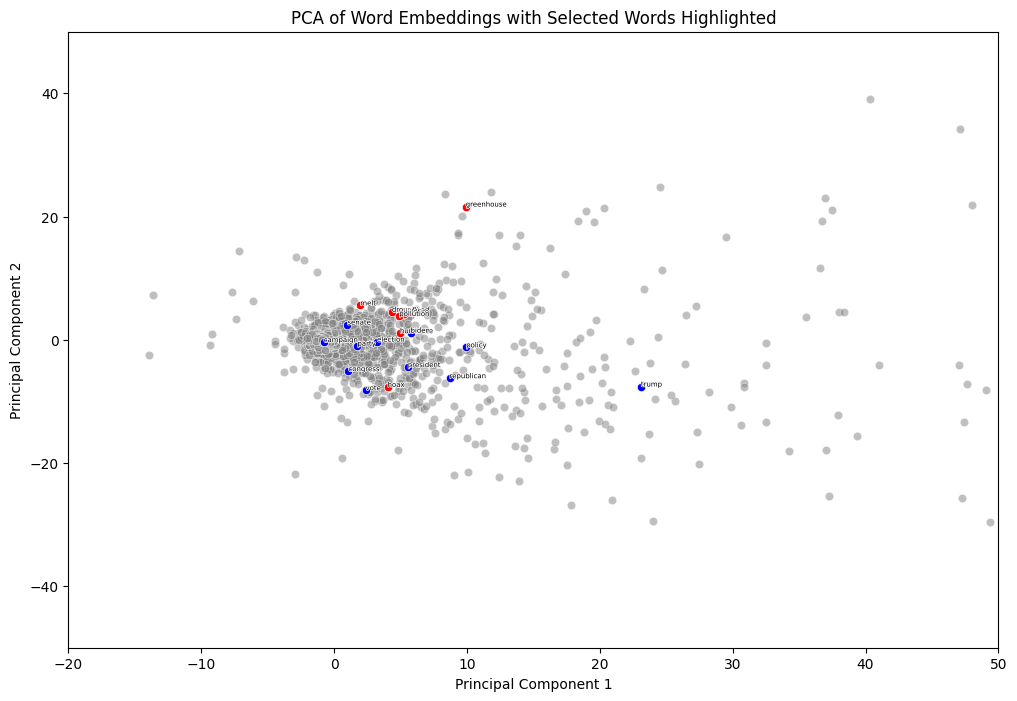

In [533]:
# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the 'word' column back for labeling
pca_df['word'] = df_embeddings['word']

# Specifying the words to highlight

climate_words = ["hurricane", "flood", "drought", "melt", "hoax", "greenhouse","warming"
                   "science", "emissions", "wildfire" , "pollution" ]

politics_words = ["trump", "biden", "republican", "greta" "democrat", "election", "congress", "senate", 
                   "president", "vote", "campaign", "party", "policy"]


# Filter the DataFrame to include only the selected words
climate_df = pca_df[pca_df['word'].isin(climate_words)]
politics_df = pca_df[pca_df['word'].isin(politics_words)]

# Plotting the PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, color='gray', alpha=0.5)

# Highlight the selected words in a different color
sns.scatterplot(x='PC1', y='PC2', data=climate_df, color='red')

sns.scatterplot(x='PC1', y='PC2', data=politics_df, color='blue')

# Annotate the points with the selected word labels with improved styling
for i in range(climate_df.shape[0]):
    txt = plt.text(x=climate_df.PC1.iloc[i], y=climate_df.PC2.iloc[i], s=climate_df.word.iloc[i], 
                   fontdict=dict(color='black', size=5, weight='roman'))
    
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='white')])
for i in range(politics_df.shape[0]):
    txt = plt.text(x=politics_df.PC1.iloc[i], y=politics_df.PC2.iloc[i], s=politics_df.word.iloc[i], 
                   fontdict=dict(color='black', size=5, weight='roman'))
    
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='white')])
plt.xlim(-20, 50)  # Example limits for PC1
plt.ylim(-50, 50)  # Example limits for PC2
plt.title('PCA of Word Embeddings with Selected Words Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [534]:
# Calculate the cosine similarity between the vectors for 'hurricane' and 'flood'
# Extract vectors for the words
vector_hurricane = pca_df[pca_df['word'] == 'hurricane'][['PC1', 'PC2']].values[0]
vector_wind = pca_df[pca_df['word'] == 'wind'][['PC1', 'PC2']].values[0]
vector_water = pca_df[pca_df['word'] == 'water'][['PC1', 'PC2']].values[0]

# Perform the arithmetic: renewable - fossil + energy
result_vector = vector_hurricane - vector_wind + vector_water

# Calculate the distances between the result_vector and all other vectors
distances = np.linalg.norm(pca_df[['PC1', 'PC2']].values - result_vector, axis=1)

# Find the indices of the five closest vectors
closest_word_indices = np.argsort(distances)[:5]

# Retrieve the corresponding words
closest_words = pca_df.iloc[closest_word_indices]['word'].values

print("The five closest words to the result of the arithmetic operation are:")
for word in closest_words:
    print(word)


The five closest words to the result of the arithmetic operation are:
weather
report
health
face
extreme


# Code

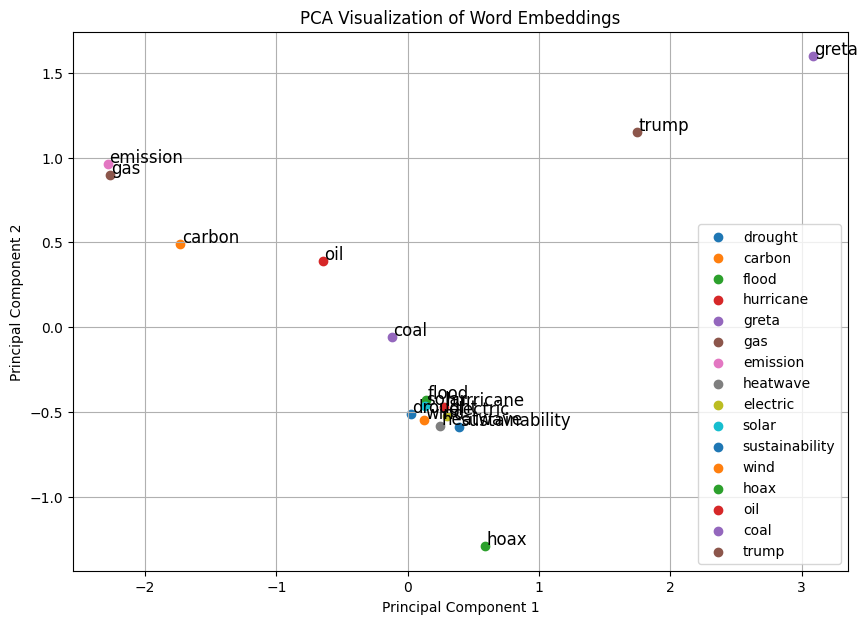

In [535]:
# List of words you want to visualize
words_to_visualize = ['carbon', 'sustainability', 'emission', "electric", "heatwave", "hurricane",
                      "drought", "flood", 
                      "trump", "greta", "wind", "solar", "coal", "oil", "gas",  "hoax"]

# Filter the dataframe for those words
df_filtered = df_embeddings[df_embeddings['word'].isin(words_to_visualize)]

# Extract the features for PCA
X = df_filtered.drop(columns=['word'])

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['word'] = df_filtered['word'].values

# Plot the results
plt.figure(figsize=(10, 7))
for i, word in enumerate(pca_df['word']):
    plt.scatter(pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i], label=word)
    plt.text(pca_df['PC1'].iloc[i] + 0.01, pca_df['PC2'].iloc[i] + 0.01, word, fontsize=12)

plt.title('PCA Visualization of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## Cosine similarity

In [536]:
# Function to find the most similar words to a given word
def find_similar_words(word, word_embeddings, top_n=10):
    word_vector = word_embeddings.loc[word].values.reshape(1, -1)
    similarities = cosine_similarity(word_vector, word_embeddings)
    similarities = similarities.flatten()
    most_similar_indices = np.argsort(similarities)[::-1][1:top_n+1]
    similar_words = word_embeddings.index[most_similar_indices]
    return similar_words, similarities[most_similar_indices]

# Filter word embeddings to include only the relevant words
climate_terms = ["sustainability", "xi", "greta", "emission", "carbon", "donald"]

similar_words_dict = {}
for term in climate_terms:
    similar_words, similarities = find_similar_words(term, df_embeddings.set_index('word'), top_n=3)
    similar_words_dict[term] = list(zip(similar_words, similarities))

# Display similar words for each climate term
for term, similar_words in similar_words_dict.items():
    print(f"Words similar to '{term}':")
    for word, similarity in similar_words:
        print(f"{word}: {similarity:.4f}")
    print("\n")


Words similar to 'sustainability':
conflict: 0.7746
education: 0.7416
biodiversity: 0.7322


Words similar to 'xi':
jinping: 0.6855
prince: 0.6466
attenborough: 0.5874


Words similar to 'greta':
activist: 0.9110
spar: 0.7936
thunberg: 0.7605


Words similar to 'emission':
gas: 0.9381
carbon: 0.9340
dioxide: 0.9101


Words similar to 'carbon':
emission: 0.9340
greenhouse: 0.8870
gas: 0.8825


Words similar to 'donald':
president: 0.7803
trump: 0.6852
barack: 0.6800




In [537]:
def cosine_similarity_between_words(word1, word2, word_embeddings):
    # Get the embeddings for the two words
    try:
        vector1 = word_embeddings.loc[word1].values.reshape(1, -1)
        vector2 = word_embeddings.loc[word2].values.reshape(1, -1)
    except KeyError as e:
        print(f"Error: {e}")
        return None
    
    # Check if the vectors are identical (which would yield a similarity of 1.0)
    if np.array_equal(vector1, vector2):
        print(f"Warning: The vectors for '{word1}' and '{word2}' are identical.")
    
    # Compute the cosine similarity
    similarity = cosine_similarity(vector1, vector2)
    
    return similarity[0][0]

# Example usage:
word1 = "emission"
word2 = "carbon"

# Assuming df_embeddings is a DataFrame with words as the index and embeddings as the columns
similarity = cosine_similarity_between_words(word1, word2, df_embeddings.set_index('word'))

print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")



Cosine similarity between 'emission' and 'carbon': 0.9339666677413528


In [538]:
# King - man + Queen classic

def find_closest_words(result_vector, word_embeddings, top_n=5):
    # Calculate cosine similarity between the result vector and all other vectors
    similarities = cosine_similarity(result_vector.reshape(1, -1), word_embeddings.values).flatten()
    
    # Get the top_n closest words
    closest_words = sorted(list(zip(word_embeddings.index, similarities)), key=lambda x: x[1], reverse=True)[:top_n]
    
    return closest_words

def perform_vector_operation(word1, word2, word3, word_embeddings):
    try:
        vector1 = word_embeddings.loc[word1].values
        vector2 = word_embeddings.loc[word2].values
        vector3 = word_embeddings.loc[word3].values
    except KeyError as e:
        print(f"Error: {e}")
        return None
    
    # Perform the vector operation: word1 - word2 + word3
    result_vector = vector1 - vector2 + vector3
    
    return result_vector

# Example usage:
word1 = "usa"
word2 = "trump"
word3 = "xi"

# Assuming df_embeddings is a DataFrame with words as the index and embeddings as the columns
result_vector = perform_vector_operation(word1, word2, word3, df_embeddings.set_index('word'))

if result_vector is not None:
    closest_words = find_closest_words(result_vector, df_embeddings.set_index('word'))
    print("5 closest words based on the vector operation are:")
    for word, similarity in closest_words:
        print(f"'{word}', similarity: {similarity:.6f}")


5 closest words based on the vector operation are:
'electronic', similarity: 0.480580
'revamp', similarity: 0.470862
'timeline', similarity: 0.425519
'las', similarity: 0.421436
'rn', similarity: 0.411312


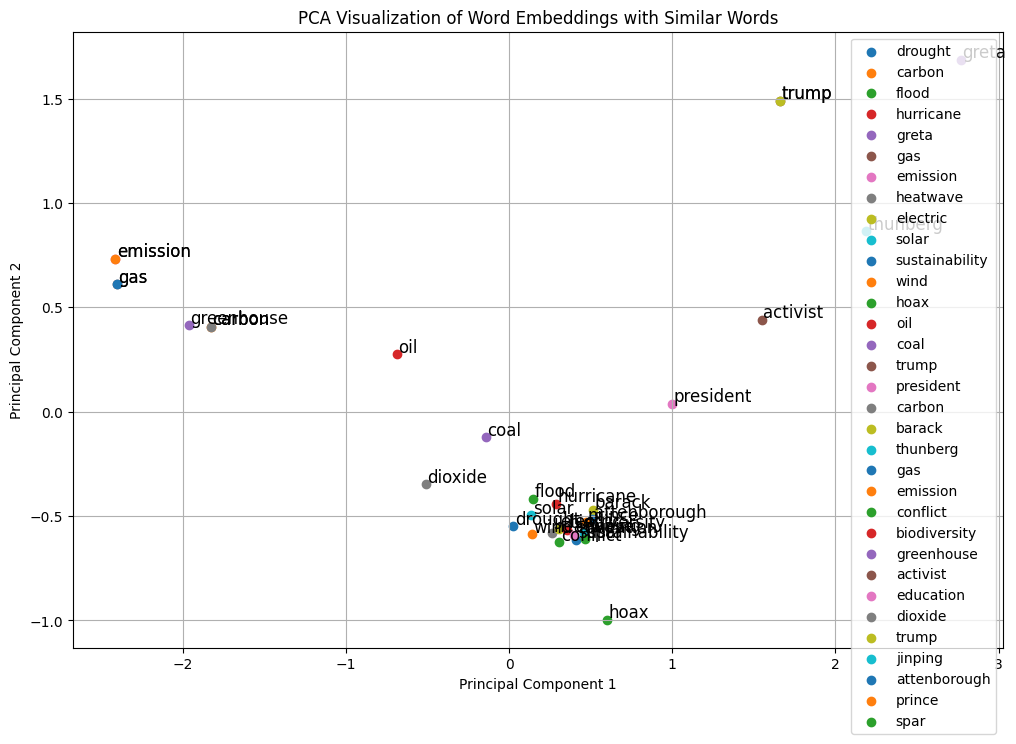

In [539]:
# Assuming you want to visualize the similar words in the same PCA space
similar_words_to_add = [word for sublist in similar_words_dict.values() for word, _ in sublist]
df_similar_filtered = df_embeddings[df_embeddings['word'].isin(similar_words_to_add)]

# Combine with your original PCA data
df_combined = pd.concat([df_filtered, df_similar_filtered])

# Perform PCA on the combined dataset
X_combined = df_combined.drop(columns=['word'])
X_combined_pca = pca.fit_transform(X_combined)

# Create a new DataFrame for PCA results
pca_df_combined = pd.DataFrame(X_combined_pca, columns=['PC1', 'PC2'])
pca_df_combined['word'] = df_combined['word'].values

# Plot the results
plt.figure(figsize=(12, 8))
for i, word in enumerate(pca_df_combined['word']):
    plt.scatter(pca_df_combined['PC1'].iloc[i], pca_df_combined['PC2'].iloc[i], label=word)
    plt.text(pca_df_combined['PC1'].iloc[i] + 0.01, pca_df_combined['PC2'].iloc[i] + 0.01, word, fontsize=12)

plt.title('PCA Visualization of Word Embeddings with Similar Words')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [540]:
# Assuming you have already filtered the DataFrame
# and extracted the features

# Apply PCA to reduce dimensions to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['word'] = df_filtered['word'].values

# Plot the results in 3D
fig = px.scatter_3d(
    pca_df, 
    x='PC1', 
    y='PC2', 
    z='PC3', 
    text='word', 
    title='3D PCA Visualization of Word Embeddings'
)

# Improve layout and appearance
fig.update_traces(marker=dict(size=8), textposition='top center')
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()